Author: @ R.karim



#Dependencies

In [0]:
import numpy as np 
import copy
import matplotlib.pyplot as plt
import time 

#Helpers Functions
Used an the algorithme of k-means clustering

In [0]:
# centroid  1D  array of complex numbers with a len equall to the number of clusters 
# points = np.array([2+1j 3+1j -2+1j 0+1j])

def compute_distance(points ,centroid):
  centroid,points = np.meshgrid(centroid,points)
  euclidian_distances = np.abs(points-centroid)
  return euclidian_distances

def compute_clusters_sets(euclidian_distances):
     indexes  = np.argmin(euclidian_distances,axis = 1)
     nb_clusters = euclidian_distances.shape[1]
     H = [[] for _ in range(nb_clusters)]
     for m,k in enumerate(indexes):
       H[k].append(points[m]) 
     return H     

def update_centroid(clusters_sets):
  centroid = []
  for ens_list in clusters_sets:  # set of sets (cluster)
    mat = np.array(ens_list)
    centroid.append(np.mean(mat))
  return np.array(centroid)

def get_data_points(size_data,uniform =False,alpha=2):
  if uniform:
    return alpha*np.random.rand(size_data)+1j*alpha*np.random.rand(size_data)
  else: 
    normal = np.random.randn(size_data//3) + 1j* np.random.randn(size_data//3)
    uniform = (1+2*np.random.rand(size_data//3)) + 1j*(1+2*np.random.rand(size_data//3))
    other = 2*(2+2*np.random.randn(size_data//3)) + 1j* (2+2*np.random.randn(size_data//3)) 
    return np.random.permutation(np.vstack((normal,uniform,other)).ravel())

def compute_variance(clusters_sets,centroid):
  clusters_variances = []
  for k,cluster in enumerate(clusters_sets):
    cluster_var = np.mean(np.abs((np.array(cluster)-centroid[k]))**2)
    clusters_variances.append(cluster_var)
  return clusters_variances
 
def plot_partitions_centroid(clusters_sets,fig,centroid):
  ax_1 = fig_1.add_subplot(1,1,1)
  color ={0:'m.',1:'b.',2:'g.',3:'c.',4:'y.',5:'k.'}
  for c, ens in enumerate(clusters_sets) :
    b = np.array(ens)
    ax_1.plot(b.real,b.imag,color[c])
    
  ax_1.plot(centroid.real,centroid.imag,'r*',markersize= 15)
  
  
      


#Generate data


In [0]:
# K means clusterins 
Nbr_Points = 1000
points = get_data_points(Nbr_Points,uniform=True)

#RUN the k-means clustering 


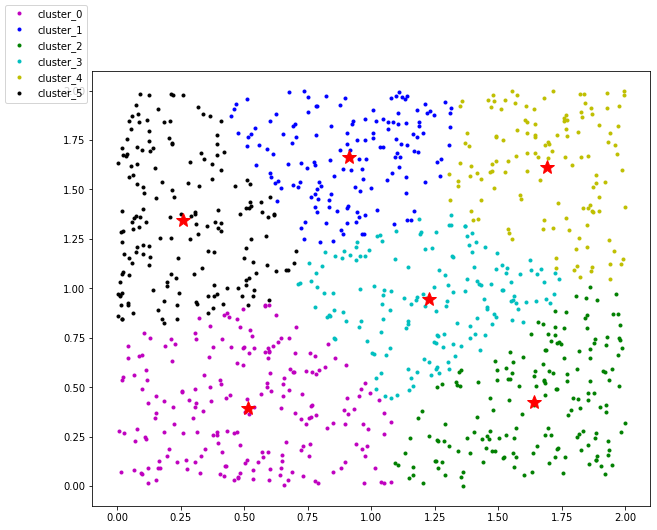

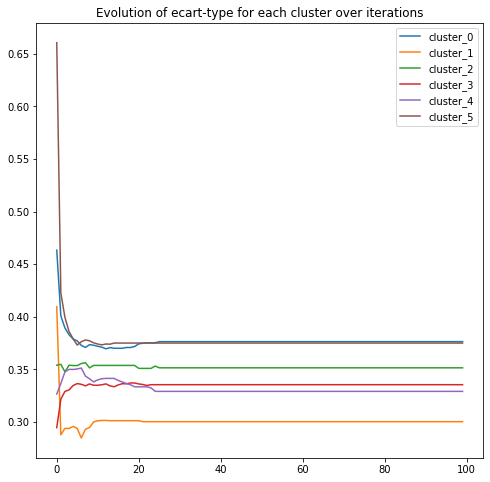

In [0]:
nbr_clusters =6
nbr_iteration = 100

def main(nbr_iteration,):
   mm = np.random.permutation(list(range(nbr_clusters)),)
   centroid = np.array([points[mm[k]] for k in range(nbr_clusters)])
   variances = []
   for it in range(nbr_iteration):
    distance = compute_distance(points ,centroid)
    H =compute_clusters_sets(distance)
    var = compute_variance(H,centroid)
    variances.append(var)
    new_centroid = update_centroid(H)
    centroid = new_centroid
   return H,np.array(variances),centroid

H,V,centroid=main(nbr_iteration)
fig_1 = plt.figure(1,figsize=(10,8))
plot_partitions_centroid(H,fig_1,centroid)
fig_1.legend(['cluster_'+str(k) for k in range(V.shape[1])],loc='upper left')

fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.plot(np.sqrt(V))
ax_2.set_title('Evolution of standard deviation for each cluster over iterations')
ax_2.legend(['cluster_'+str(k) for k in range(V.shape[1])],loc='upper right')

In [0]:
from google.colab import widgets
import random
from matplotlib import pylab
grid = widgets.Grid(1,1)
for i in range(20):
  with grid.output_to(0,0):
    grid.clear_cell()
    pylab.figure(1,figsize=(10, 10))
    pylab.plot(i*np.array([0,1,2,3,4]))
  time.sleep(0.5)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
  

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=100, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

IndexError: ignored

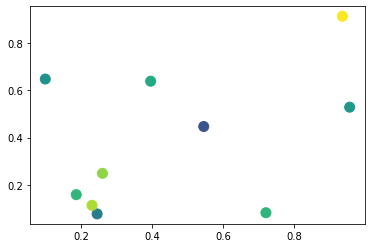

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat))
    plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

main()